# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
import sagemaker
from sagemaker.pytorch import PyTorch
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-05-30 07:35:28--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.120
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  47.8MB/s    in 26s     

2022-05-30 07:36:04 (41.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [4]:
import os
data_dir = 'dogImages'
train_dir = os.path.join(data_dir, 'train')
print(os.listdir(train_dir))
print(len(os.listdir(train_dir)))

['114.Otterhound', '110.Norwegian_lundehund', '127.Silky_terrier', '091.Japanese_chin', '095.Kuvasz', '061.English_cocker_spaniel', '043.Canaan_dog', '131.Wirehaired_pointing_griffon', '124.Poodle', '087.Irish_terrier', '053.Cocker_spaniel', '064.English_toy_spaniel', '105.Neapolitan_mastiff', '032.Boston_terrier', '017.Bearded_collie', '094.Komondor', '003.Airedale_terrier', '084.Icelandic_sheepdog', '122.Pointer', '098.Leonberger', '125.Portuguese_water_dog', '009.American_water_spaniel', '058.Dandie_dinmont_terrier', '115.Papillon', '006.American_eskimo_dog', '041.Bullmastiff', '085.Irish_red_and_white_setter', '081.Greyhound', '004.Akita', '103.Mastiff', '044.Cane_corso', '118.Pembroke_welsh_corgi', '013.Australian_terrier', '117.Pekingese', '002.Afghan_hound', '025.Black_and_tan_coonhound', '129.Tibetan_mastiff', '093.Kerry_blue_terrier', '023.Bernese_mountain_dog', '070.German_pinscher', '052.Clumber_spaniel', '048.Chihuahua', '088.Irish_water_spaniel', '050.Chinese_shar-pei', '1

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from PIL import Image
list_train_img = os.path.join(train_dir, '110.Norwegian_lundehund')
n_img_110_Norwegian_lundehund = os.listdir(list_train_img)
img_path = os.path.join(list_train_img, n_img_110_Norwegian_lundehund[0])
img = Image.open(img_path)
img_array = np.array(img)
img_array.shape

(275, 350, 3)

In [7]:
#TODO: Fetch and upload the data to AWS S3
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = 'dogImages'
role = sagemaker.get_execution_role()
print(bucket, role)
# inputs = sagemaker_session.upload_data('dogImages', bucket=bucket, key_prefix=prefix)
inputs = 's3://sagemaker-us-east-1-995169529774/dogImages'
print(f"Input spec: {inputs}")

sagemaker-us-east-1-995169529774 arn:aws:iam::995169529774:role/service-role/AmazonSageMaker-ExecutionRole-20220404T220695
Input spec: s3://sagemaker-us-east-1-995169529774/dogImages


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [8]:
#TODO: Declare your HP ranges, metrics etc.
hp_ranges = {
    'lr': ContinuousParameter(0.001, 0.1),
    'batch_size': CategoricalParameter([8, 16, 32, 64]),
    'epochs': IntegerParameter(2, 10)
}

In [9]:
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [10]:
#TODO: Create estimators for your HPs

# TODO: Your estimator here
estimator =  PyTorch(
    entry_point = 'hpo.py',
    role = role,
    py_version='py36',
    framework_version = '1.8',
    instance_count = 1,
    instance_type = 'ml.m5.large',
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config
)
#task_tag with value 'DGL' to help tracking the hyperparameter tuning task
task_tags = [{"Key": "ML Task", "Value": "DGL"}]
# TODO: Your HP tuner here
objective_metric_name = "Average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hp_ranges,
    metric_definitions,
    tags=task_tags,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit({"training": inputs}) # TODO: Remember to include your data channels

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [14]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-05-30 21:27:15 Starting - Preparing the instances for training
2022-05-30 21:27:15 Downloading - Downloading input data
2022-05-30 21:27:15 Training - Training image download completed. Training in progress.
2022-05-30 21:27:15 Uploading - Uploading generated training model
2022-05-30 21:27:15 Completed - Training job completed


{'_tuning_objective_metric': '"Average test loss"',
 'batch_size': '"64"',
 'epochs': '7',
 'lr': '0.003201166895514509',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-05-30-17-16-24-707"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-05-30-17-16-24-707/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [4]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile
import sagemaker
from sagemaker.pytorch import PyTorch

import boto3
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
import os
import IPython

[2022-06-05 07:13:26.872 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None


In [5]:
hyperparameters = {"epochs": "7", "batch-size": "64",  "test-batch-size": "50", "lr": "0.003"}

In [6]:
# TODO: Create and fit an estimator
rules = [
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

debuger_config = DebuggerHookConfig(
    hook_parameters={'train.save_interval': "100", 'eval.save_interval': '10'}
)
# TODO: Your estimator here
estimator = PyTorch(
    role = sagemaker.get_execution_role(),
    instance_count= 1,
    instance_type = "ml.m5.large",
    entry_point = "train_model.py",
    framework_version = "1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    rules=rules,
    debugger_hook_config=debuger_config
)

In [16]:
estimator.fit({"training": inputs}, wait=True)

2022-06-02 13:15:06 Starting - Starting the training job...
2022-06-02 13:15:22 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2022-06-02 13:16:59 Downloading - Downloading input data..................
2022-06-02 13:20:00 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-06-02 13:19:55,136 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-06-02 13:19:55,139 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-06-02 13:19:55,155 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-06-02 13:19:55,168 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-06-02 13:

In [17]:
# attached_estimator = estimator.attach("pytorch-training-2022-05-31-16-23-52-314")
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [18]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-06-02 15:49:42.837 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/debug-output


In [26]:
trial.tensor_names()

[2022-06-02 16:32:06.895 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-06-02 16:32:07.930 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:210] Loaded all steps


['NLLLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer2.4.relu_input_0',
 'layer2.4.relu_input_1',
 'layer2.4.relu_input_2',
 'layer2.5.relu_input_0',
 'layer2.5.relu_input_1',
 'layer2.5.relu_input_2',
 'layer2.6.relu_input_0',
 'layer2.6.relu_input_1',
 'layer2.6.relu_input_2',
 'layer2.7.relu_input_0',
 'layer2.7.relu_input_1',
 'layer2.7.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer

In [19]:
# TODO: Plot a debugging output.
# Source AWS sagemaker https://github.com/aws/amazon-sagemaker-examples/blob/main/sagemaker-debugger/pytorch_model_debugging/pytorch_script_change_smdebug.ipynb"
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

In [21]:
def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


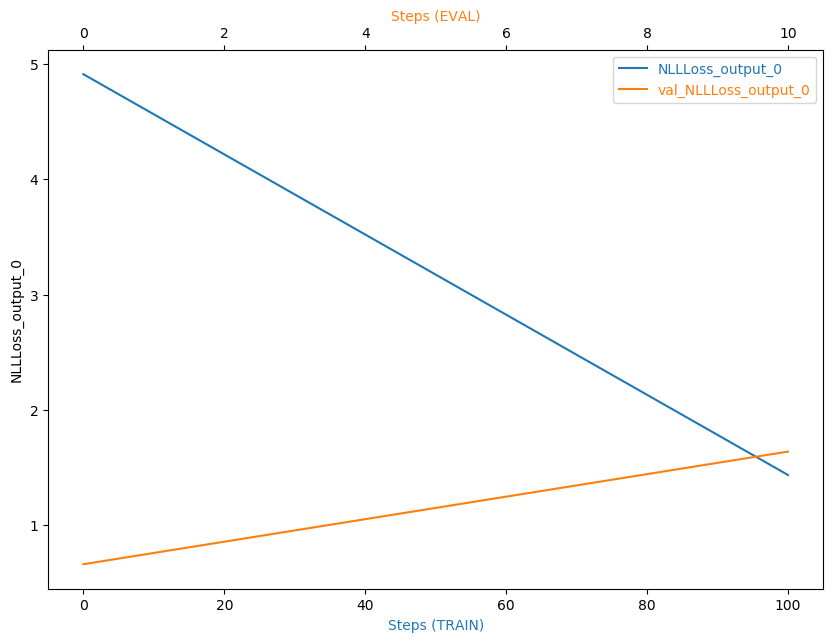

In [27]:
plot_tensor(trial, "NLLLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [22]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [23]:
! aws s3 ls {rule_output_path} --recursive

2022-06-02 15:48:40     386832 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-06-02 15:48:39     236857 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-06-02 15:48:35        193 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-06-02 15:48:35        201 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-06-02 15:48:35       1962 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-06-02 15:48:35        127 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-06-02 15:48:35        200 pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-re

In [24]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to ProfilerReport/profiler-output/profiler-report.ipynb
download: s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-0

In [25]:
# TODO: Display the profiler output
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [7]:
!pip install torch

In [8]:
!pip install torchvision

  Using cached torchvision-0.12.0-cp37-cp37m-manylinux1_x86_64.whl (21.0 MB)


In [5]:
from sagemaker.pytorch.model import PyTorchModel

In [ ]:
# attached_estimator = estimator.attach("pytorch-training-2022-05-31-16-23-52-314")

In [25]:
# TODO: Deploy your model to an endpoint
# predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

pytorch_model = PyTorchModel(
    model_data='s3://sagemaker-us-east-1-995169529774/pytorch-training-2022-06-02-13-15-05-334/output/model.tar.gz',
    role = sagemaker.get_execution_role(),
    framework_version = "1.8",
    py_version="py36",
    entry_point='inference.py'
)

In [26]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type="ml.t2.medium")

--------------!

In [35]:
print(predictor.endpoint_name)

pytorch-inference-2022-06-04-10-08-24-050


In [32]:
import json
import numpy as np

In [43]:
# TODO: Run an prediction on the endpoint

# image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
# response = predictor.predict(image)

image =  '{"url":"https://cdn.pixabay.com/photo/2015/11/17/13/13/puppy-1047521_1280.jpg"}'
response = client.invoke_endpoint(EndpointName=predictor.endpoint_name,
                                      ContentType='application/json',
                                      Body=image)
result = json.loads(response['Body'].read().decode())
print(result)

[{'prediction': '037.Brittany', 'score': '98.4553337097168%'}, {'prediction': '032.Boston_terrier', 'score': '0.7618525065481663%'}, {'prediction': '058.Dandie_dinmont_terrier', 'score': '0.37255838979035616%'}]


In [44]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()